In [1]:
import numpy               as np
import matplotlib.pyplot   as plt
import pandas              as pd
import utils               as u

# Synthetic data

### Comparing a uniform with a mixture of uniforms

100%|███████████████████████████████████████████████████████████████████████████████| 10/10 [1:33:34<00:00, 561.47s/it]


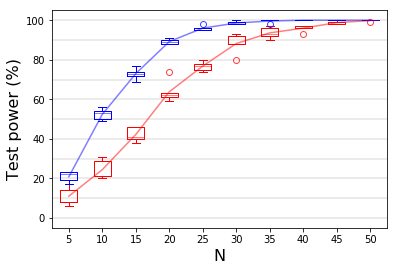

In [3]:
Nrange = range(5,55,5)
a      = .35
dg     = lambda N : u.generateUniforms(N, 0.5, a)

np.random.seed(0)
dataKME, dataKVE = u.sampleRangeExperiment(dg, Nrange, **u.TWOSAMPLEKWARGS) 
figUniforms = u.plotRes(dataKME, dataKVE, Nrange)

### Independence testing between a uniform and a $\chi^2$

100%|██████████████████████████████████████████████████████████████████████████████| 10/10 [2:56:05<00:00, 1056.55s/it]


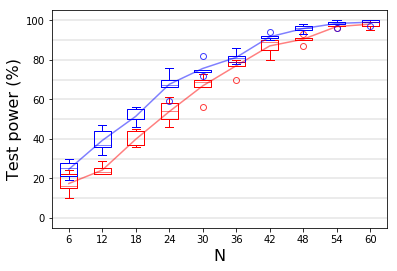

In [2]:
Nrange = range(6,66,6) 
rho    = .5
dg     = lambda N : u.generateUniformAndChi2(N, rho)

np.random.seed(0)
dataHSIC, dataCSIC = u.sampleRangeExperiment(dg, Nrange, **u.INDEPKWARGS)
figUniformAndGaussian = u.plotRes(dataHSIC, dataCSIC, Nrange)

### Classical vs. kernelized cumulants

In [8]:
def linker(x,y,bw):
    return np.outer(x,y)

dg = lambda N : u.generateUniformAndChi2(N, rho = 0.5)
Nrange = [20, 30]

np.random.seed(0)
clasVar, clasSkew = u.sampleRangeExperiment(dg, Nrange, **u.INDEPKWARGS, kernel = linker)
kernVar, kernSkew = u.sampleRangeExperiment(dg, Nrange, **u.INDEPKWARGS)

for data in [clasVar, clasSkew, kernVar, kernSkew]:
    print(100 * np.percentile(data, 50, axis=1), 
          100 * 0.5 * (np.percentile(data, 75, axis=1)-np.percentile(data, 25, axis=1)))

100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [21:07<00:00, 633.65s/it]

[19. 17.] [3.  0.5]
[56. 68.] [3.5 1. ]
[39. 65.] [4.5 3.5]
[59. 79.] [3.  1.5]


# Real data 

In [3]:
def readBikeDate():
    data_raw = pd.read_csv('SeoulBikeData.csv', encoding = 'unicode_escape')
    labels = data_raw['Seasons']

    data_raw['Functioning Day'] = u.cat2num(data_raw['Functioning Day'])
    data_raw['Holiday']         = u.cat2num(data_raw['Holiday'])
    data = data_raw.drop(['Date', 'Seasons'], axis=1).values

    X = u.standardise(data[labels=='Winter'])
    Y = u.standardise(data[labels=='Autumn'])
    
    return X,Y

def readTrafficData():
    data_raw = pd.read_csv('Behavior of the urban traffic of the city of Sao Paulo in Brazil.csv', delimiter=';')
    X = u.standardise(data_raw.values[:,1:-1])
    Y = u.standardise(np.array(list(x.replace(',', '.') for x in data_raw.values[:,-1])).astype(np.float))
    return X, Y

### Bike data

100%|███████████████████████████████████████████████████████████████████████████████| 11/11 [1:35:02<00:00, 518.38s/it]


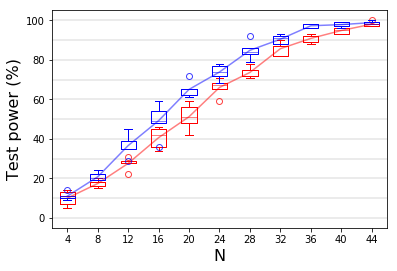

In [7]:
X,Y    = readBikeDate()
dg     = lambda N : u.dataGen(N,X,Y)
Nrange = range(4, 48, 4)

np.random.seed(0)
dataKME, dataKVE = u.sampleRangeExperiment(dg, Nrange, **u.TWOSAMPLEKWARGS)
    
figBikes = u.plotRes(dataKME, dataKVE, Nrange)

### Bike data - Type I error

100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [52:21<00:00, 392.64s/it]


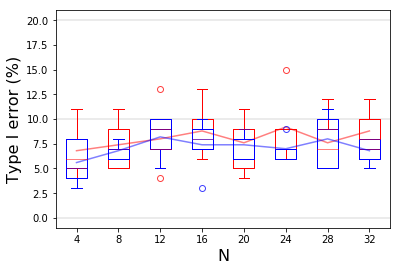

In [6]:
X,Y    = readBikeDate()
dg     = lambda N : u.dataGen(N,X,X)
Nrange = range(4, 36, 4)

np.random.seed(0)
dataKME, dataKVE = u.sampleRangeExperiment(dg, Nrange, **u.TWOSAMPLEKWARGS) 

figBikesTypeI = u.plotRes(dataKME, dataKVE, Nrange, ylabel = 'Type I error (%)', maxLines = 30)

### Brazilian traffic 

100%|███████████████████████████████████████████████████████████████████████████████| 10/10 [2:24:28<00:00, 866.81s/it]


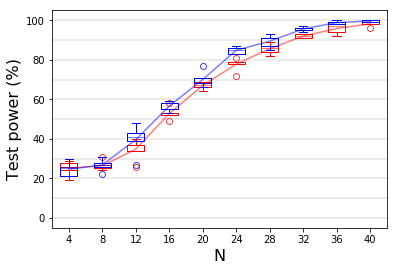

In [5]:
X, Y   = readTrafficData()
Nrange = range(4, 44, 4)
def dg(N, dep = True):
    indsX = np.random.randint(Y.shape[0], size=N)
    indsY = indsX if dep else np.random.randint(Y.shape[0], size=N)
    return X[indsX], Y[indsY]

np.random.seed(0)
dataHSIC, dataCSIC = u.sampleRangeExperiment(dg, Nrange, **u.INDEPKWARGS) 
    
figTraffic = u.plotRes(dataHSIC, dataCSIC, Nrange)

### Brazilian traffic skewness comparison

100%|██████████████████████████████████████████████████████████████████████████████| 10/10 [3:18:38<00:00, 1191.85s/it]


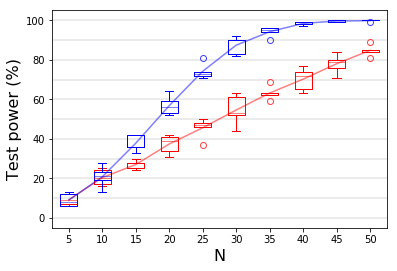

In [31]:
X, Y   = readTrafficData()
Nrange = range(5, 55, 5)
Z = X[Y>0.3]
W = X[Y<0.3]
dg     = lambda N : u.dataGen(N,W,Z)

np.random.seed(0)
dataKME, dataKVE = u.sampleRangeExperiment(dg, Nrange, perm_test= u.two_sample_permutation_test, mmd1 = u.KME, mmd2 = u.KSE)
    
figSkewness = u.plotRes(dataKME, dataKVE, Nrange)

# Computational complexity

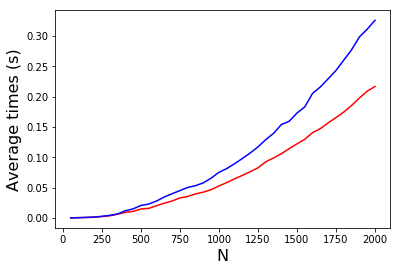

In [2]:
figKMEvKVE = u.compareStatisticsCompTime(range(50, 2050, 50), u.KME, u.KVE, num_aver = 20)

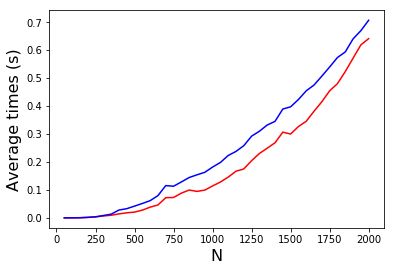

In [3]:
figHSICvCSIC = u.compareStatisticsCompTime(range(50, 2050, 50), lambda x,y,k :u.HSIC(x,y,k,k), lambda x,y,k :u.CSIC(x,y,k,k), 
                                           num_aver = 20)

In [32]:
figSkewness.savefig("SkewnessTraffic.pdf", bbox_inches='tight')